# 公司产品下期价格预测

* 学号：
* 姓名：

## 一 导入Python库

In [1]:
import numpy as np  # numpy:数据处理库
import pandas as pd # pandas :数据分析库
from sklearn.model_selection import train_test_split  # sklearn:机器学习库
import matplotlib.pyplot as plt # matplotlib：数据可视化库
from sklearn.linear_model import LinearRegression
import warnings   # 发出警告,或者忽略它或引发异常。
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['simhei']
from sklearn import metrics

## 二 获取数据

In [2]:
file_name = 'data/价格数据.csv'
df = pd.read_csv(file_name)

In [3]:
df.head() #查看数据

,日期,公司销售价格,国内市场价格,下游钢材产量,下游钢材价格
0,2015-01-31,498.580269,570.00,8291.6,2550
1,2015-02-28,492.396414,630.00,8240.2,2503
2,2015-03-31,491.533390,513.23,10510.1,2462
3,2015-04-30,445.604796,620.00,10409.5,2423
4,2015-05-31,449.923229,590.00,11766.2,2383


In [4]:
df.describe() #查看数据统计信息

,公司销售价格,国内市场价格,下游钢材产量,下游钢材价格
count,57.000000,57.000000,57.000000,57.000000
mean,504.355011,519.749649,9609.338596,3055.438596
std,94.277418,87.346652,2225.055692,786.449141
min,333.880932,305.000000,6465.900000,1628.000000
25%,429.518495,485.000000,7399.600000,2383.000000
50%,492.396414,530.000000,10256.700000,3250.000000
75%,567.038294,575.000000,11753.300000,3760.000000
max,746.968531,745.000000,13156.400000,4169.000000


## 三 数据预处理
- 常规操作：
    - 1 删除空值
    - 2 删除重复值

In [5]:
# 数据存在空值, 删除空值
df = df.dropna()
# 删除完全一样的数据，去重
df.drop_duplicates(inplace=True)  
# inplace :是直接在原来数据上修改还是保留一个副本

## 四 拆分数据集
- 将数据集拆分为训练集和测试集。
    - 训练集：用来建立模型
    - 测试集：用来评估模型
- 一般训练集和测试集的比例是7:3或者是8:2

In [6]:
X = df[['国内市场价格', '下游钢材产量', '下游钢材价格']]
y = df['公司销售价格']
# 四 拆分数据集，一部分作为训练集，一部分作为测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 五 建立模型

In [7]:
lr = LinearRegression()

## 六 训练模型

In [8]:
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print(f'回归方程的系数:{lr.coef_}')
print(f'回归方程的截距:{lr.intercept_}')
print(f'回归方程的R平方:{lr.score(X,y)}')

回归方程的系数:[ 0.56874811 -0.00509515  0.04085642]
回归方程的截距:131.22741613046924
回归方程的R平方:0.7244870895538301


## 七 评估模型
- 1 计算模型预测测试集的结果与测试集真实数据的均方误差
- 2 可视化测试集的真实数据与模型预测的测试集数据

In [10]:
y_pred = lr.predict(X_test)
mse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('均方误差MSE:', mse_value)
r2_score_value = metrics.r2_score(y_test, y_pred)
print('决定系数R2:', r2_score_value)

均方误差MSE: 33.536977107587255
决定系数R2: 0.8678824378630822


### 测试集：可视化测试集的真实数据与模型预测的测试集数据

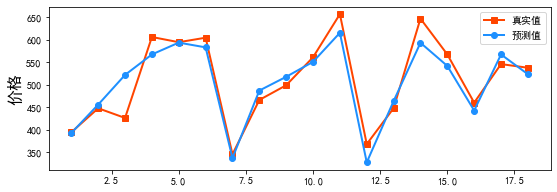

In [11]:
fig, axs = plt.subplots(figsize=(9, 3))
plt.plot(range(1, len(y_test) + 1), y_test, 's-', color='orangered', label="真实值", linewidth=2)  # s-:方形
plt.plot(range(1, len(y_test) + 1), y_pred, 'o-', color='dodgerblue', label="预测值", linewidth=2)  # o-:圆形
plt.ylabel("价格", fontsize=16)  # 纵坐标名字
plt.legend(loc="best")  # 图例
plt.savefig('images/模拟值与测试值的关系.png')
plt.show()

## 八 输出模型
- 1 输出模型的权重，截距
- 2 输出模型方程

### 得到$\beta _{1},\beta _{2},...\beta _{k}$

In [12]:
print('权重参数：',lr.coef_)  

权重参数： [ 0.56874811 -0.00509515  0.04085642]


### $\beta _{0}$，截距，默认有截距

In [13]:
print('截距：',lr.intercept_ )
f = str(lr.intercept_) + ' + ' + str(lr.coef_[0]) + '*国内市场价格' + ' + ' + str(lr.coef_[1]) + '*下游钢材产量' + ' + ' + str(
    lr.coef_[2]) + '*下游钢材价格'
print('模型：y=', f)

截距： 131.22741613046924
模型：y= 131.22741613046924 + 0.5687481105869039*国内市场价格 + -0.005095146937998442*下游钢材产量 + 0.04085642176715272*下游钢材价格


### 九 模型预测下期价格数据，并保存预测结果
### 获取下期因素数据

In [14]:
df_next = pd.read_csv('data/价格预测数据下期因素数据.csv')
# 模型预测下期价格数据
price_next = lr.predict(df_next[['国内市场价格', '下游钢材产量', '下游钢材价格']].values)
# 保存预测结果
df_next['预测值'] = price_next
df_next.to_csv('data/价格预测数据结果.csv',  index=False, encoding='utf-8-sig')